In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
import seaborn as sns
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
jurl = 'https://rss.joins.com/joins_news_list.xml'
response = REQ.urlopen( jurl )
soup = BeautifulSoup( response, 'html.parser') #html.parser , html5lib
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<title>조인스프라임 종료 안내</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex " name="robots"/>
<link href="https://static.joins.com/joins_store/ui/css/joins2019/common.css?20220630153430" rel="stylesheet"/>
</head>
<body>
<div class="pc_service_closing">
<div class="head">
<div class="logo"><span class="visually_hidden">조인스프라임</span></div>
<p class="bg_gray">
<strong>
                    조인스프라임 서비스가<br/>
                    2022년 6월 30일 종료되었습니다.
                </strong>
<em>그동안 조인스프라임 서비스를 이용해주신 분들께 감사드립니다.</em>
</p>
</div>
<!--div class="body">
            5초 후 중앙일보 페이지로 이동합니다.
        </div-->
<div class="foot">
<a href="https://www.joongang.co.kr/">중앙일보 바로가기</a>
<a href="https://jtbc.co.kr/">JTBC 바로가기</a>
</div>
</div>
</body>
</html>

In [4]:
kurl ='http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
kresponse = REQ.urlopen( kurl )
ksoup = BeautifulSoup( kresponse, 'html.parser') #html.parser , html5lib
ksoup

C:\ProgramData\Anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2022년 12월 31일 (토)요일 18:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2022년 12월 31일 (토)요일 18:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
<header>
<title>서울,경기도 육상중기예보</title>
<tm>202212311800</tm>
<wf><![CDATA[○ (강수) 6일(금) 오후에는 비 또는 눈이 오는 곳이 있겠습니다.  <br />○ (기온) 4일(수)~5일(목) 아침 기온은 -14~-4도로 평년(최저기온 -11~-4도)보다 낮겠고, 낮 기온은 0~5도로 평년(최고기온 2~3도)과 비슷하겠습니다.<br />          6일(금)~10일(화) 아침 기온은 -9~0도, 낮 기온은 1~6도로 평년(최저기온 -11~-5도, 최고기온 1~3도)보다 높겠습니다.<br />○ (해상) 서해중부해상의 물결은 7일(토)은 1.0~2.5m, 그 밖의 날은 1.0~2.0m로 일겠습니다.<br /><br />* 이번 예보 기간에는 대기가 건조하겠으니, 산불 등 화재예방에 유의하기 바랍니다.]]></wf>
</header>
<

In [5]:
#도시만 출력하시오
for location in ksoup.select('location'):
    print(location.city.string)

서울
인천
수원
파주
이천
평택
백령도
과천
광명
강화
김포
시흥
안산
부천
의정부
고양
양주
동두천
연천
포천
가평
구리
남양주
양평
하남
안양
오산
화성
성남
의왕
군포
안성
용인
광주
여주


In [6]:
for location in ksoup.select('location'):
    print(location.city.string)
    print("======================")
    for data in location.select('data'):
        print('날짜:',  data.tmef.string )
        print('날씨 : ',data.wf.string)
        print('최저 : ',data.tmn.text)
        print('최고 : ',data.tmx.text)
        print("--------------------------")

서울
날짜: 2023-01-03 00:00
날씨 :  맑음
최저 :  -9
최고 :  0
--------------------------
날짜: 2023-01-03 12:00
날씨 :  맑음
최저 :  -9
최고 :  0
--------------------------
날짜: 2023-01-04 00:00
날씨 :  맑음
최저 :  -7
최고 :  2
--------------------------
날짜: 2023-01-04 12:00
날씨 :  맑음
최저 :  -7
최고 :  2
--------------------------
날짜: 2023-01-05 00:00
날씨 :  맑음
최저 :  -5
최고 :  4
--------------------------
날짜: 2023-01-05 12:00
날씨 :  맑음
최저 :  -5
최고 :  4
--------------------------
날짜: 2023-01-06 00:00
날씨 :  구름많음
최저 :  -2
최고 :  5
--------------------------
날짜: 2023-01-06 12:00
날씨 :  구름많고 비/눈
최저 :  -2
최고 :  5
--------------------------
날짜: 2023-01-07 00:00
날씨 :  흐림
최저 :  -1
최고 :  2
--------------------------
날짜: 2023-01-07 12:00
날씨 :  맑음
최저 :  -1
최고 :  2
--------------------------
날짜: 2023-01-08 00:00
날씨 :  맑음
최저 :  -6
최고 :  2
--------------------------
날짜: 2023-01-09 00:00
날씨 :  맑음
최저 :  -4
최고 :  4
--------------------------
날짜: 2023-01-10 00:00
날씨 :  구름많음
최저 :  -1
최고 :  4
--------------------------
인천
날짜: 2023-01-03 00:00
날

In [7]:
kList = []
for location in ksoup.select('location'):
    for data in location.select('data'):
        kList.append( {'도시':location.city.string,
                      '날짜':data.tmef.string,
                      '날씨':data.wf.string,
                      '최저':int(data.tmn.string),
                      '최고':int(data.tmx.string)}  )
kList

[{'도시': '서울', '날짜': '2023-01-03 00:00', '날씨': '맑음', '최저': -9, '최고': 0},
 {'도시': '서울', '날짜': '2023-01-03 12:00', '날씨': '맑음', '최저': -9, '최고': 0},
 {'도시': '서울', '날짜': '2023-01-04 00:00', '날씨': '맑음', '최저': -7, '최고': 2},
 {'도시': '서울', '날짜': '2023-01-04 12:00', '날씨': '맑음', '최저': -7, '최고': 2},
 {'도시': '서울', '날짜': '2023-01-05 00:00', '날씨': '맑음', '최저': -5, '최고': 4},
 {'도시': '서울', '날짜': '2023-01-05 12:00', '날씨': '맑음', '최저': -5, '최고': 4},
 {'도시': '서울', '날짜': '2023-01-06 00:00', '날씨': '구름많음', '최저': -2, '최고': 5},
 {'도시': '서울', '날짜': '2023-01-06 12:00', '날씨': '구름많고 비/눈', '최저': -2, '최고': 5},
 {'도시': '서울', '날짜': '2023-01-07 00:00', '날씨': '흐림', '최저': -1, '최고': 2},
 {'도시': '서울', '날짜': '2023-01-07 12:00', '날씨': '맑음', '최저': -1, '최고': 2},
 {'도시': '서울', '날짜': '2023-01-08 00:00', '날씨': '맑음', '최저': -6, '최고': 2},
 {'도시': '서울', '날짜': '2023-01-09 00:00', '날씨': '맑음', '최저': -4, '최고': 4},
 {'도시': '서울', '날짜': '2023-01-10 00:00', '날씨': '구름많음', '최저': -1, '최고': 4},
 {'도시': '인천', '날짜': '2023-01-03 00:00', '날씨': '맑음', '최

In [17]:
kdf = pd.DataFrame( kList)
kdf

,도시,날짜,날씨,최저,최고
0,서울,2023-01-03 00:00,맑음,-9,0
1,서울,2023-01-03 12:00,맑음,-9,0
2,서울,2023-01-04 00:00,맑음,-7,2
3,서울,2023-01-04 12:00,맑음,-7,2
4,서울,2023-01-05 00:00,맑음,-5,4
5,서울,2023-01-05 12:00,맑음,-5,4
6,서울,2023-01-06 00:00,구름많음,-2,5
7,서울,2023-01-06 12:00,구름많고 비/눈,-2,5
8,서울,2023-01-07 00:00,흐림,-1,2
9,서울,2023-01-07 12:00,맑음,-1,2


In [18]:
# 도시와 날짜를 인덱스로 설정
kdf.set_index(['도시','날짜'] ,inplace=True)
pd.set_option("display.max_rows", None)
kdf

날씨  최저  최고
도시  날짜                                
서울  2023-01-03 00:00        맑음  -9   0
    2023-01-03 12:00        맑음  -9   0
    2023-01-04 00:00        맑음  -7   2
    2023-01-04 12:00        맑음  -7   2
    2023-01-05 00:00        맑음  -5   4
    2023-01-05 12:00        맑음  -5   4
    2023-01-06 00:00      구름많음  -2   5
    2023-01-06 12:00  구름많고 비/눈  -2   5
    2023-01-07 00:00        흐림  -1   2
    2023-01-07 12:00        맑음  -1   2
    2023-01-08 00:00        맑음  -6   2
    2023-01-09 00:00        맑음  -4   4
    2023-01-10 00:00      구름많음  -1   4
인천  2023-01-03 00:00        맑음  -7  -1
    2023-01-03 12:00        맑음  -7  -1
    2023-01-04 00:00        맑음  -6   2
    2023-01-04 12:00        맑음  -6   2
    2023-01-05 00:00        맑음  -4   4
    2023-01-05 12:00        맑음  -4   4
    2023-01-06 00:00      구름많음   0   5
    2023-01-06 12:00  구름많고 비/눈   0   5
    2023-01-07 00:00        흐림  -1   2
    2023-01-07 12:00        맑음  -1   2
    2023-01-08 00:00        맑음  -5   2
    2023-01-09 00:00        맑음  -2   4
    2023-01-10 00:00      구름많음   0   4
수원  2023-01-03 00:00        맑음  -9   1
    2023-01-03 12:00        맑음  -9   1
    2023-01-04 00:00        맑음  -8   3
    2023-01-04 12:00        맑음  -8   3
    2023-01-05 00:00        맑음  -6   5
    2023-01-05 12:00        맑음  -6   5
    2023-01-06 00:00      구름많음  -3   6
    2023-01-06 12:00  구름많고 비/눈  -3   6
    2023-01-07 00:00        흐림  -2   3
    2023-01-07 12:00        맑음  -2   3
    2023-01-08 00:00        맑음  -6   3
    2023-01-09 00:00        맑음  -4   5
    2023-01-10 00:00      구름많음  -2   4
파주  2023-01-03 00:00        맑음 -16  -1
    2023-01-03 12:00        맑음 -16  -1
    2023-01-04 00:00        맑음 -14   0
    2023-01-04 12:00        맑음 -14   0
    2023-01-05 00:00        맑음 -12   2
    2023-01-05 12:00        맑음 -12   2
    2023-01-06 00:00      구름많음  -6   4
    2023-01-06 12:00  구름많고 비/눈  -6   4
    2023-01-07 00:00        흐림  -5   1
    2023-01-07 12:00        맑음  -5   1
    2023-01-08 00:00        맑음  -9   3
    2023-01-09 00:00        맑음  -6   4
    2023-01-10 00:00      구름많음  -4   2
이천  2023-01-03 00:00        맑음 -12   0
    2023-01-03 12:00        맑음 -12   0
    2023-01-04 00:00        맑음 -11   2
    2023-01-04 12:00        맑음 -11   2
    2023-01-05 00:00        맑음 -10   3
    2023-01-05 12:00        맑음 -10   3
    2023-01-06 00:00      구름많음  -6   4
    2023-01-06 12:00  구름많고 비/눈  -6   4
    2023-01-07 00:00        흐림  -4   2
    2023-01-07 12:00        맑음  -4   2
    2023-01-08 00:00        맑음  -8   3
    2023-01-09 00:00        맑음  -6   5
    2023-01-10 00:00      구름많음  -4   3
평택  2023-01-03 00:00        맑음  -9   1
    2023-01-03 12:00        맑음  -9   1
    2023-01-04 00:00        맑음  -9   2
    2023-01-04 12:00        맑음  -9   2
    2023-01-05 00:00        맑음  -7   3
    2023-01-05 12:00        맑음  -7   3
    2023-01-06 00:00      구름많음  -3   5
    2023-01-06 12:00  구름많고 비/눈  -3   5
    2023-01-07 00:00        흐림  -2   2
    2023-01-07 12:00        맑음  -2   2
    2023-01-08 00:00        맑음  -6   4
    2023-01-09 00:00        맑음  -4   6
    2023-01-10 00:00      구름많음  -2   2
백령도 2023-01-03 00:00        맑음  -3   2
    2023-01-03 12:00        맑음  -3   2
    2023-01-04 00:00        맑음  -2   2
    2023-01-04 12:00        맑음  -2   2
    2023-01-05 00:00        맑음  -1   4
    2023-01-05 12:00        맑음  -1   4
    2023-01-06 00:00      구름많음   3   6
    2023-01-06 12:00  구름많고 비/눈   3   6
    2023-01-07 00:00        흐림   0   2
    2023-01-07 12:00        맑음   0   2
    2023-01-08 00:00        맑음   0   4
    2023-01-09 00:00        맑음   2   4
    2023-01-10 00:00      구름많음   0   1
과천  2023-01-03 00:00        맑음 -10   1
    2023-01-03 12:00        맑음 -10   1
    2023-01-04 00:00        맑음  -8   2
    2023-01-04 12:00        맑음  -8   2
    2023-01-05 00:00        맑음  -8   3
    2023-01-05 12:00        맑음  -8   3
    2023-01-06 00:00      구름많음  -3   5
    2023-01-06 12:00  구름많고 비/눈  -3   5
    2023-01-07 00:00        흐림  -3   2
    2023-01-07 12:00        맑음  -3   2
    2023-01

In [19]:
# 도시별 최고, 최저기온 평균
kdf.pivot_table( index='도시' )

,최고,최저
도시,,
가평,0.923077,-11.153846
강화,1.692308,-6.923077
고양,2.230769,-7.153846
과천,2.692308,-6.000000
광명,2.615385,-3.769231
광주,1.461538,-7.384615
구리,2.307692,-6.076923
군포,2.769231,-4.384615
김포,2.076923,-5.846154


In [20]:
# '눈'이 오는 도시 날짜 날씨를 구하라
kdf[ kdf['날씨'].str.contains('눈') ] # 없음

,,날씨,최저,최고
도시,날짜,,,
서울,2023-01-06 12:00,구름많고 비/눈,-2,5
인천,2023-01-06 12:00,구름많고 비/눈,0,5
수원,2023-01-06 12:00,구름많고 비/눈,-3,6
파주,2023-01-06 12:00,구름많고 비/눈,-6,4
이천,2023-01-06 12:00,구름많고 비/눈,-6,4
평택,2023-01-06 12:00,구름많고 비/눈,-3,5
백령도,2023-01-06 12:00,구름많고 비/눈,3,6
과천,2023-01-06 12:00,구름많고 비/눈,-3,5
광명,2023-01-06 12:00,구름많고 비/눈,-1,5


In [21]:
# 최저기온이 가장 낮은 도시, 날짜, 최고기온을 구하라
kdf.nsmallest( 1, columns='최저', keep='all' )

날씨  최저  최고
도시 날짜                          
가평 2023-01-03 00:00  맑음 -17  -1
   2023-01-03 12:00  맑음 -17  -1

In [23]:
# 도시를 입력받아 해당도시 데이터를 구하라
city = input('도시입력:')
kdf.loc[city]

도시입력:서울


,날씨,최저,최고
날짜,,,
2023-01-03 00:00,맑음,-9,0
2023-01-03 12:00,맑음,-9,0
2023-01-04 00:00,맑음,-7,2
2023-01-04 12:00,맑음,-7,2
2023-01-05 00:00,맑음,-5,4
2023-01-05 12:00,맑음,-5,4
2023-01-06 00:00,구름많음,-2,5
2023-01-06 12:00,구름많고 비/눈,-2,5
2023-01-07 00:00,흐림,-1,2


In [24]:
# 느낌 컬럼을 추가하고 최고기온에 따라 다음과 같이 표시해라
# 10도 이하면: 매우 추움
# 5 ~ -9면: 추움
# 나머지: 보통
def fn(v):
    if -9<=v<=-5:
        return '추움'
    elif -10 >= v:
        return '매우추움'
    else:
        return '보통'
kdf['느낌'] = kdf['최저'].apply( fn )
kdf

날씨  최저  최고    느낌
도시  날짜                                      
서울  2023-01-03 00:00        맑음  -9   0    추움
    2023-01-03 12:00        맑음  -9   0    추움
    2023-01-04 00:00        맑음  -7   2    추움
    2023-01-04 12:00        맑음  -7   2    추움
    2023-01-05 00:00        맑음  -5   4    추움
    2023-01-05 12:00        맑음  -5   4    추움
    2023-01-06 00:00      구름많음  -2   5    보통
    2023-01-06 12:00  구름많고 비/눈  -2   5    보통
    2023-01-07 00:00        흐림  -1   2    보통
    2023-01-07 12:00        맑음  -1   2    보통
    2023-01-08 00:00        맑음  -6   2    추움
    2023-01-09 00:00        맑음  -4   4    보통
    2023-01-10 00:00      구름많음  -1   4    보통
인천  2023-01-03 00:00        맑음  -7  -1    추움
    2023-01-03 12:00        맑음  -7  -1    추움
    2023-01-04 00:00        맑음  -6   2    추움
    2023-01-04 12:00        맑음  -6   2    추움
    2023-01-05 00:00        맑음  -4   4    보통
    2023-01-05 12:00        맑음  -4   4    보통
    2023-01-06 00:00      구름많음   0   5    보통
    2023-01-06 12:00  구름많고 비/눈   0   5    보통
    2023-01-07 00:00        흐림  -1   2    보통
    2023-01-07 12:00        맑음  -1   2    보통
    2023-01-08 00:00        맑음  -5   2    추움
    2023-01-09 00:00        맑음  -2   4    보통
    2023-01-10 00:00      구름많음   0   4    보통
수원  2023-01-03 00:00        맑음  -9   1    추움
    2023-01-03 12:00        맑음  -9   1    추움
    2023-01-04 00:00        맑음  -8   3    추움
    2023-01-04 12:00        맑음  -8   3    추움
    2023-01-05 00:00        맑음  -6   5    추움
    2023-01-05 12:00        맑음  -6   5    추움
    2023-01-06 00:00      구름많음  -3   6    보통
    2023-01-06 12:00  구름많고 비/눈  -3   6    보통
    2023-01-07 00:00        흐림  -2   3    보통
    2023-01-07 12:00        맑음  -2   3    보통
    2023-01-08 00:00        맑음  -6   3    추움
    2023-01-09 00:00        맑음  -4   5    보통
    2023-01-10 00:00      구름많음  -2   4    보통
파주  2023-01-03 00:00        맑음 -16  -1  매우추움
    2023-01-03 12:00        맑음 -16  -1  매우추움
    2023-01-04 00:00        맑음 -14   0  매우추움
    2023-01-04 12:00        맑음 -14   0  매우추움
    2023-01-05 00:00        맑음 -12   2  매우추움
    2023-01-05 12:00        맑음 -12   2  매우추움
    2023-01-06 00:00      구름많음  -6   4    추움
    2023-01-06 12:00  구름많고 비/눈  -6   4    추움
    2023-01-07 00:00        흐림  -5   1    추움
    2023-01-07 12:00        맑음  -5   1    추움
    2023-01-08 00:00        맑음  -9   3    추움
    2023-01-09 00:00        맑음  -6   4    추움
    2023-01-10 00:00      구름많음  -4   2    보통
이천  2023-01-03 00:00        맑음 -12   0  매우추움
    2023-01-03 12:00        맑음 -12   0  매우추움
    2023-01-04 00:00        맑음 -11   2  매우추움
    2023-01-04 12:00        맑음 -11   2  매우추움
    2023-01-05 00:00        맑음 -10   3  매우추움
    2023-01-05 12:00        맑음 -10   3  매우추움
    2023-01-06 00:00      구름많음  -6   4    추움
    2023-01-06 12:00  구름많고 비/눈  -6   4    추움
    2023-01-07 00:00        흐림  -4   2    보통
    2023-01-07 12:00        맑음  -4   2    보통
    2023-01-08 00:00        맑음  -8   3    추움
    2023-01-09 00:00        맑음  -6   5    추움
    2023-01-10 00:00      구름많음  -4   3    보통
평택  2023-01-03 00:00        맑음  -9   1    추움
    2023-01-03 12:00        맑음  -9   1    추움
    2023-01-04 00:00        맑음  -9   2    추움
    2023-01-04 12:00        맑음  -9   2    추움
    2023-01-05 00:00        맑음  -7   3    추움
    2023-01-05 12:00        맑음  -7   3    추움
    2023-01-06 00:00      구름많음  -3   5    보통
    2023-01-06 12:00  구름많고 비/눈  -3   5    보통
    2023-01-07 00:00        흐림  -2   2    보통
    2023-01-07 12:00        맑음  -2   2    보통
    2023-01-08 00:00        맑음  -6   4    추움
    2023-01-09 00:00        맑음  -4   6    보통
    2023-01-10 00:00      구름많음  -2   2    보통
백령도 2023-01-03 00:00        맑음  -3   2    보통
    2023-01-03 12:00        맑음  -3   2    보통
    2023-01-04 00:00        맑음  -2   2    보통
    2023-01-04 12:00        맑음  -2   2    보통
    2023-01-05 00:00        맑음  -1   4    보통
    2023-01-05 12:00        맑음  -1   4    보통
    2023-01-06 00:00      구름많음   3   6    보통
    2023-01-06 12:00  구름많고 비/눈   3   6    보통
    2023-01-07 00:00        흐림   0   2    보통
    2023-01-07 12:00   

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from curr

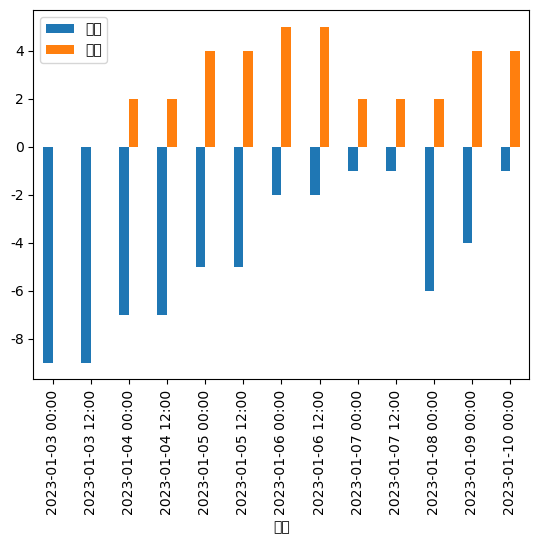

In [25]:
# 서울지역의 날짜별 최고 최저기온을 바차트로 그려라
g = kdf.loc['서울'].groupby('날짜')
g.mean().plot(kind='bar')
plt.show()

In [27]:
# 여주지역 최저기온이 -10도 이하인 데이터를 구하라
yeo =kdf.loc['여주']
yeo[ yeo['최저']<=-10 ]

,날씨,최저,최고,느낌
날짜,,,,
2023-01-03 00:00,맑음,-11,-1,매우추움
2023-01-03 12:00,맑음,-11,-1,매우추움
2023-01-04 00:00,맑음,-11,1,매우추움
2023-01-04 12:00,맑음,-11,1,매우추움
2023-01-05 00:00,맑음,-10,2,매우추움
2023-01-05 12:00,맑음,-10,2,매우추움


In [28]:
# 여주지역 전체 최고기온 중 최고기온이 0도 이상이 차지하는 비율을 구하라
zeroCount = len(  kdf.loc['여주'].query('최고>=0') )
tot = len( kdf.loc['여주'] )
print(tot, zeroCount )
round( (zeroCount/tot)*100 ,2)

13 11


84.62

In [29]:
# 일교차 컬럼을 추가하고, 최고기온과 최저기온의 차이가 가장높은 도시, 날짜, 최저, 최고 일교차를 구하라
kdf['일교차'] = kdf['최고'] - kdf['최저']
kdf.nlargest(1,'일교차',keep='all')

날씨  최저  최고    느낌  일교차
도시 날짜                                     
가평 2023-01-04 00:00  맑음 -16   1  매우추움   17
   2023-01-04 12:00  맑음 -16   1  매우추움   17